# Paso 4. Análisis exploratorio de datos (Python)

In [4]:
# se importan las librerías necesarias para el análisis de losa archivos
import pandas as pd
import matplotlib.pyplot as plt

In [126]:
# se leen los archivos .csv con las rutas relativas establecidas
df_company_trips=pd.read_csv("../datasets/moved_project_sql_result_01.csv")
df_location_average_trips = pd.read_csv("../datasets/moved_project_sql_result_04.csv")

In [127]:
# estudiamos los datos que contiene cada uno de los dataframes
df_company_trips.info() # trips: el número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017. 
print()
df_company_trips.head(10), df_company_trips.tail(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB



(                        company_name  trips_amount
 0                          Flash Cab         19558
 1          Taxi Affiliation Services         11422
 2                   Medallion Leasin         10367
 3                         Yellow Cab          9888
 4    Taxi Affiliation Service Yellow          9299
 5          Chicago Carriage Cab Corp          9181
 6                       City Service          8448
 7                           Sun Taxi          7701
 8          Star North Management LLC          7455
 9  Blue Ribbon Taxi Association Inc.          5953,
                                  company_name  trips_amount
 54                  2192 - 73487 Zeymane Corp            14
 55                  6057 - 24657 Richard Addo            13
 56              5997 - 65283 AW Services Inc.            12
 57                                Metro Group            11
 58                    5062 - 34841 Sam Mestas             8
 59               4053 - 40193 Adwar H. Nikola             7


In [128]:
df_location_average_trips.info() # average_trips: el promedio de viajes que terminaron en cada barrio en noviembre de 2017.
print()
df_location_average_trips.head(10), df_location_average_trips.tail(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB



(  dropoff_location_name  average_trips
 0                  Loop   10727.466667
 1           River North    9523.666667
 2         Streeterville    6664.666667
 3             West Loop    5163.666667
 4                O'Hare    2546.900000
 5             Lake View    2420.966667
 6            Grant Park    2068.533333
 7         Museum Campus    1510.000000
 8            Gold Coast    1364.233333
 9    Sheffield & DePaul    1259.766667,
    dropoff_location_name  average_trips
 84          West Pullman       6.466667
 85             Montclare       5.766667
 86           West Elsdon       5.666667
 87               Pullman       3.896552
 88                 Undef       3.800000
 89       Mount Greenwood       3.137931
 90             Hegewisch       3.117647
 91              Burnside       2.333333
 92             East Side       1.961538
 93             Riverdale       1.800000)

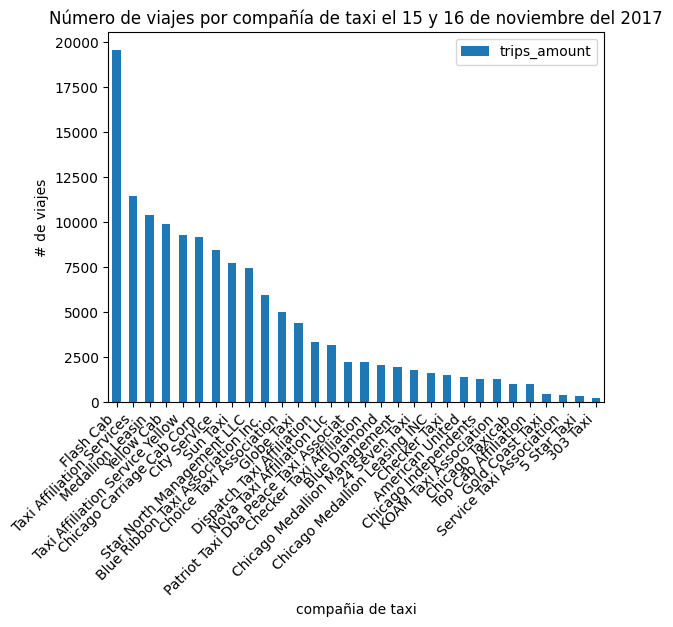

In [130]:
df_company_trips=df_company_trips.sort_values(by='trips_amount', ascending=False) #ordenamos los datos de forma ascendente en la columna trips amount.

df_company_trips.head(30).plot(kind='bar', x='company_name', y='trips_amount') #se seleccionan las 30 empresas de taxi con mayores cantidad de viajes
plt.title('Número de viajes por compañía de taxi el 15 y 16 de noviembre del 2017')
plt.xlabel('compañia de taxi')
plt.ylabel('# de viajes')
plt.xticks(rotation=45,ha='right')
plt.show()

#del gráfico se puede notar que la empresa Flash Cab es la que tiene mayor demanda de número de viajes respecto a las otras empresas entre el 15 y 16 de noviembre del 2017. Alrededor de casi el doble de la segunda empresa con mayor demanda (Taxi Affiliation Services). Desde la empresa Patriot Taxi Dba Peace Taxi Associat en adelante, presentan menos de 2500 viajes entre las fechas indicadas.

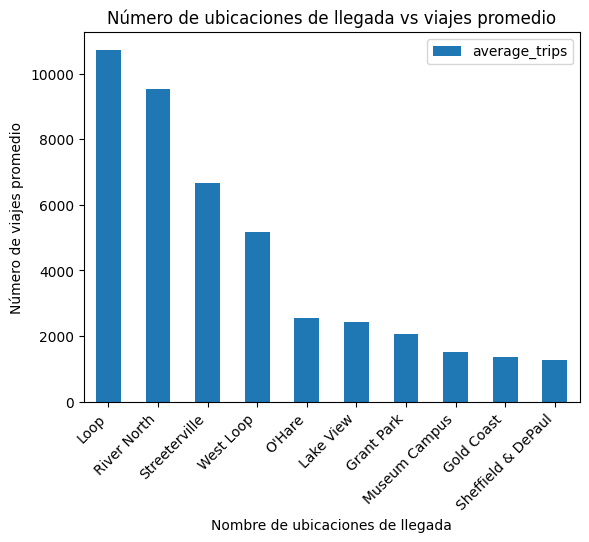

In [131]:
df_location_average_trips=df_location_average_trips.sort_values(by='average_trips', ascending=False) # Las empresas se han ordenado de manera descendente respecto al numero de viajes promedio dependiendo de la ciudad de llegada. 

df_location_average_trips.head(10).plot(kind='bar', x='dropoff_location_name', y='average_trips')
plt.title('Número de ubicaciones de llegada vs viajes promedio')
plt.xlabel('Nombre de ubicaciones de llegada')
plt.ylabel('Número de viajes promedio')
plt.xticks(rotation=45, ha='right')
plt.show()

# el viaje promedio de mayor destino es Loop y River North con un número de viajes promedio entre 9.5k y 10.5k, respectivamente. Luego, con menos de 3k viajes promedio las empresas O'Hare en adelante.

Conclusiones:
- La empresa Flash Cab es la preferida entre los usuarios de taxis debido al alto número de viajes que posee en comparación a la segunda empresa en el día 15 y 16 de Noviembre. Es probable que sea debido a la estragia de la empresa para captar más usurios siendo algunas de estas, precios accesibles, calidad de los choferes, calidad del auto, seguridad de llegar al destino establecido, etc.
- Los destinos con mayores llegadas de los taxis son Loop y River North en el mes de Nomviembre. Es probable que en estos destinos alvergue gran cantidad de personas y sean parte de las barrios principales. De la misma manera, se podría decir de los barrios de Streeterville y West Loop, son barrios intermedios. Los barrios de O'Hare en adelante, al parecer son más pequeñas donde no hay gran cantidad de población respecto a las que son los principales destinos. 

# Paso 5. Prueba de hipótesis (Python)

In [62]:
# librerías adicionales a las ya importadas
from scipy import stats as st
import numpy as np

In [6]:
#verificamos el contenido del archivo .csv
df_weather_and_duration = pd.read_csv("../datasets/moved_project_sql_result_07.csv")
df_weather_and_duration.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [14]:
df_weather_and_duration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [7]:
df_weather_and_duration['weather_conditions'].unique() # Bad para las condiciones climaticas que contienen la palabra "rain" o "storm" y para las demás, Good.

array(['Good', 'Bad'], dtype=object)

In [43]:
df_weather_and_duration['duration_seconds'].describe() # empleamos el método .describe() para determinar las estadísticas de la columnas que tiene los valores de duración promedio en segundos.

count    1068.000000
mean     2071.731273
std       769.461125
min         0.000000
25%      1438.250000
50%      1980.000000
75%      2580.000000
max      7440.000000
Name: duration_seconds, dtype: float64

In [28]:
# extraemos los días sábados en condiciones "Bad". Dentro de esta condicion, están los días lluviosos o con tormenta.

weather_bad=[]

for i in range(len(df_weather_and_duration['weather_conditions'])):
    if df_weather_and_duration['weather_conditions'][i]=='Bad':
        weather_bad.append((
            df_weather_and_duration['start_ts'][i],
            df_weather_and_duration['weather_conditions'][i],
            df_weather_and_duration['duration_seconds'][i]))

weather_bad

[('2017-11-04 16:00:00', 'Bad', np.float64(2969.0)),
 ('2017-11-18 12:00:00', 'Bad', np.float64(1980.0)),
 ('2017-11-04 17:00:00', 'Bad', np.float64(2460.0)),
 ('2017-11-04 16:00:00', 'Bad', np.float64(2760.0)),
 ('2017-11-18 12:00:00', 'Bad', np.float64(2460.0)),
 ('2017-11-18 10:00:00', 'Bad', np.float64(1440.0)),
 ('2017-11-04 18:00:00', 'Bad', np.float64(2363.0)),
 ('2017-11-18 16:00:00', 'Bad', np.float64(3000.0)),
 ('2017-11-04 16:00:00', 'Bad', np.float64(3120.0)),
 ('2017-11-18 07:00:00', 'Bad', np.float64(1511.0)),
 ('2017-11-04 18:00:00', 'Bad', np.float64(1980.0)),
 ('2017-11-18 08:00:00', 'Bad', np.float64(1320.0)),
 ('2017-11-18 13:00:00', 'Bad', np.float64(4044.0)),
 ('2017-11-04 16:00:00', 'Bad', np.float64(2782.0)),
 ('2017-11-18 12:00:00', 'Bad', np.float64(3024.0)),
 ('2017-11-18 13:00:00', 'Bad', np.float64(3300.0)),
 ('2017-11-04 16:00:00', 'Bad', np.float64(3180.0)),
 ('2017-11-18 10:00:00', 'Bad', np.float64(2055.0)),
 ('2017-11-18 09:00:00', 'Bad', np.float64(126

In [ ]:
df_weather_bad=pd.DataFrame(weather_bad, columns=['start_ts','weather_conditions','duration_seconds'])
df_weather_bad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            180 non-null    object 
 1   weather_conditions  180 non-null    object 
 2   duration_seconds    180 non-null    float64
dtypes: float64(1), object(2)
memory usage: 4.3+ KB


In [35]:
df_weather_bad['duration_seconds'].describe()

count     180.000000
mean     2427.205556
std       721.314138
min       480.000000
25%      1962.000000
50%      2540.000000
75%      2928.000000
max      4980.000000
Name: duration_seconds, dtype: float64

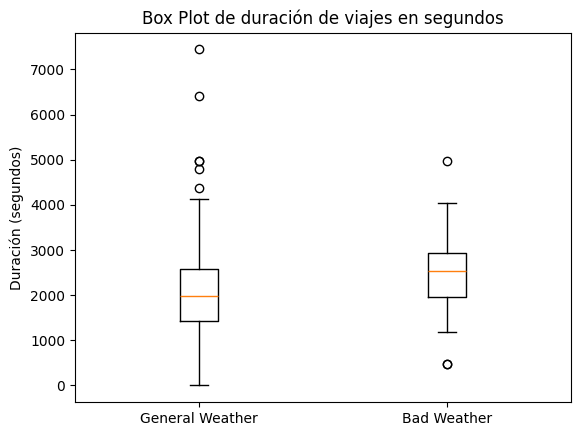

In [ ]:
plt.boxplot([df_weather_and_duration['duration_seconds'],df_weather_bad['duration_seconds']], tick_labels=['General Weather', 'Bad Weather'])
plt.title('Box Plot de duración de viajes en segundos')
plt.ylabel('Duración (segundos)')
plt.show()

Del boxplot izquiedo, se percibe lo siguiente:
    - Presenta un sesgo positivo. 
    - Presenta valores atípicos o outliers mayores a los 4k en duración de viajes. Estos valores alteran la media porque es más sensible al haber valores atípicos. No obstante, la media no se ve alterada. A pesar de ello, la distancia entre la media y la mediana no están abrupta con una diferencia de 2071 - 1980 = aprox 90 segundos.

Del boxplot derecho, se percibe lo siguiente:
    - No se presenta gran cantidad de valores atípicos. 
    - Se presentan un sesgo negativo, ya que la media se encuentra a la izquierda de la mediana. A pesar de ello, la diferencia entre ellos es de 113 segundos. No es tanta la diferencia.

## Hipótesis: "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".

- Usamos como hipótesis nula (H₀) que el promedio de los viajes generales desde el Loop hasta el Aeropuerto Internacional O'Hare no cambia en los viajes con días lluviosos. 
- Usamos como hipótesis alternativa (H1) que el promedio de los viajes generales desde el Loop hasta el Aeropuerto Internacional O'Hare cambia en los viajes con días lluviosos. 

In [110]:
array_data_general=np.array(df_weather_and_duration['duration_seconds']) # matriz de los datos con las condiciones generales
array_data_bad_weather=np.array(df_weather_bad['duration_seconds']) # matriz de los datos con las condiciones malas. Dentro se encuentra los lluviosos

alpha=0.05 # se establece un valor de significancia de 5%. Es decir, que solo se acepta un valor de 5% de cometer errores. 

# se realiza la prueba a continución:
results = st.ttest_ind(array_data_general, array_data_bad_weather, equal_var=True) # Las diferencias de las variaciones estandar entres ambos arrays son relativamente bajas, se coloca que son iguales, ya que esto puede afectar significativamente en el resultado del valor p.

print('valor p: ', results.pvalue) # extraer el valor p. Esto nos indica si los resultados del análisis son estadísticamente significativos. 

if results.pvalue < alpha: # comparar el valor p
    print("Rechazamos la hipótesis nula: El promedio de viajes cambia en sábados lluviosos.")
else:
    print("No podemos rechazar la hipótesis nula: No hay evidencia suficiente de que el promedio de viajes cambie.")

valor p:  9.198675425169079e-09
Rechazamos la hipótesis nula: El promedio de viajes cambia en sábados lluviosos.


el valor p obtenido es un valor muy reducido del orden de prácticamente 0% de probabilidad de que ocurra la hipótesis nula, por lo que se rechaza la hipótesis nula.

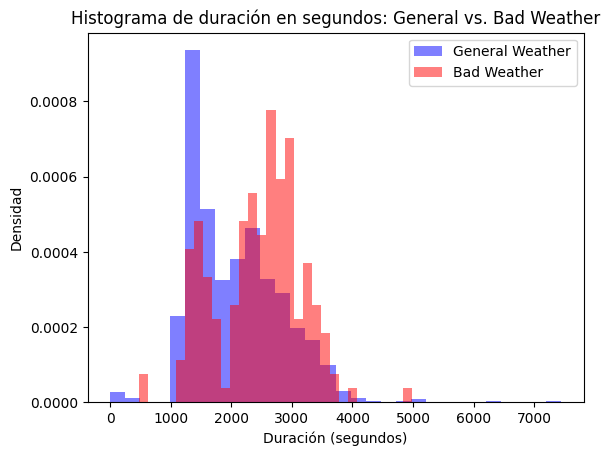

In [105]:
# Histograma para las condiciones generales del clima
plt.hist(array_data_general, bins=30, alpha=0.5, label='General Weather', color='blue', density=True)

# Histograma para las condiciones malas del clima
plt.hist(array_data_bad_weather, bins=30, alpha=0.5, label='Bad Weather', color='red', density=True)

plt.title('Histograma de duración en segundos: General vs. Bad Weather')
plt.xlabel('Duración (segundos)')
plt.ylabel('Densidad')
plt.legend()
plt.show()


en este gráfico de barras, se visualizan las medianas de cada población, y los sesgos que presentan cada uno

### Explica:

cómo planteaste las hipótesis nula y alternativa? 

- La hipótesis nula asume que el promedio de las dos poblaciones, en este caso, array_data_general y array_data_bad_weather, se igualan los valores promedios de duraciuón de viajes porque se asume que no hay cambios. 
- La hipótesis alternativa es opuesta a la nula y asume que el promedio de las dos poblaciones mencionadas cambian los valores promedios de duraciuón de viajes.

qué criterio usaste para probar las hipótesis y por qué

- Se necesita comparar las medias de dos poblaciones estadísticamente diferentes. Se emplea un análisis estadítico como la prueba t-student para realziar una prueba de hipótesis de dos muestras independientes.
- Se asume un error o umbral de 5%.El valor de alpha puede ser menor. Esto depende del costo de error que implica la hipótesis.
- Un valor bajo de probabilidad de los valores promedio de array_data_general y array_data_bad_weather (valor p), es decir, menor que el umbral alpha, indica que se rechaza la hipótesis y evidenciamos que no son iguales los promedios y la duración promedio cambia los sábados del mes de Noviembre del 2017 en Chicago. Caso contrario que el valor p sea mayor al umbral establecido quiere decir que no hay evidencia suficiente de que la duración promedio de los viajes cambie los sábados del mes de Noviembre del 2017 en Chicago.

En conclusión, La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos en el mes de Noviembre del 2017.